### Exercise

Repeat the steps shown previously for the age-satisfaction data for the new set of data:

- The y variable is "Bodyfat"
- Choose two variables x that are correlated to y
- Calculate the matrix of parameters $\hat{\beta}$
- Use statsmodel to compute the parameters.

- Calculate SSR, SST, SSE, $R^2$ using matrices
- Calculate SSR, SST, SSE, $R^2$ using statsmodel
- Using statsmodels, print a summary of the regression result and study the significance of the parameters.|

### Choose two variables x that are correlated to y

In [3]:
import pandas as pd

df = pd.read_csv("bodyfat.csv")
df.head()

,Density,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<AxesSubplot:>

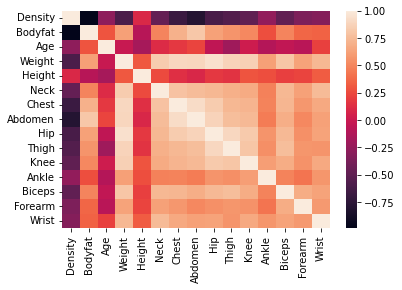

In [8]:
import seaborn as sb

sb.heatmap(df.corr())

In [11]:
df_x = df[["Abdomen", "Chest"]].values
df_y = df["Bodyfat"].values

### Calculate the matrix of parameters $\hat{\beta}$

In [17]:
import numpy as np

tx = df_x.transpose()

x_tx = np.matmul(tx, df_x)
x_ty = np.matmul(tx, df_y)

inv_x_tx = np.linalg.inv(x_tx)

hat_beta = np.matmul(inv_x_tx, x_ty)
hat_beta

array([ 1.04859917, -0.77099236])

### Use statsmodel to compute the parameters

In [18]:
import statsmodels.formula.api as smf

reg_model = smf.ols("Bodyfat ~ Abdomen + Chest", data=df)
reg_results = reg_model.fit()

print(reg_results.params)


Intercept   -30.273825
Abdomen       0.817939
Chest        -0.260656
dtype: float64


### Calculate SSR, SST, SSE, $R^2$ using matrices

In [21]:
# Initial variables
n = len(df["Bodyfat"])
k = 2
p = k + 1

# Calculate sst, ssr, sse
ty = df_y.transpose()
tb = hat_beta.transpose()

# SST
sst = np.matmul(df_y, ty) - n * df_y.mean() ** 2

# SSR
tx_y = np.matmul(tx, df_y)
ssr = np.matmul(tb, tx_y) - n * df_y.mean() ** 2

# SSE
sse = np.matmul(ty, df_y) - np.matmul(tb, tx_y)

# Check SST
print(f"SST = {sst}")
print(f"SSR = {ssr}")
print(f"SSE = {sse}")
print(f"F = {(ssr / k) / (sse / (n - p))}")
print(f"R2 = {ssr / sst}")
print(f"Adjusted R2= {1 - (sse / (n - p)) / (sst / (n - 1))}")
print(f"SST == SSR + SSE = {sst == ssr + sse}")

SST = 17578.989841269824
SSR = 10540.667090882547
SSE = 7038.322750387277
F = 186.4525256024482
R2 = 0.599617337859565
Adjusted R2= 0.596401412862453
SST == SSR + SSE = True


### Calculate SSR, SST, SSE, $R^2$ using statsmodels

In [23]:
# Check SST
print(f"SST = {reg_results.ess + reg_results.ssr}")
print(f"SSR = {reg_results.ess}")
print(f"SSE = {reg_results.ssr}")
print(f"F = {reg_results.fvalue}")
print(f"R2 = {reg_results.rsquared}")
print(f"Adjusted R2= {reg_results.rsquared_adj}")
print(f"SST == SSR + SSE = {sst == ssr + sse}")

SST = 17578.98984126984
SSR = 11826.97907138659
SSE = 5752.010769883249
F = 255.99028814362208
R2 = 0.6727905970808761
Adjusted R2= 0.670162409105622
SST == SSR + SSE = True
